**Lab Task 1**: Plot all the given functions to observe the roots by visualization, fill the table by your visual guess of root. We have plotted one function for you.</br>
1) $f(x)=cos(x)-1.3x$</br>
2) $f(x)=xcos(x)-2x^2+3x-1$</br>
3) $f(x)=2xcos(2x)-(x+1)^2$





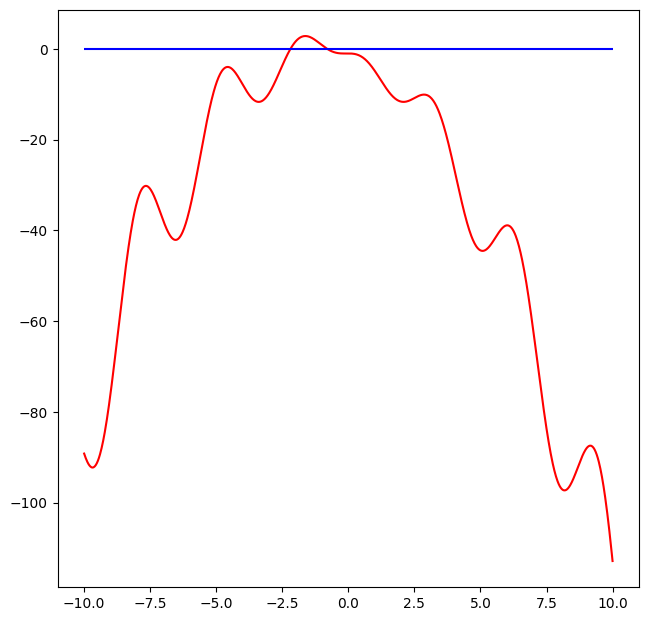

In [7]:

import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 7.50]

def f(x):
    return 2*x*(np.cos(2*x)) - (x+1)**2

x = np.linspace(-10,10 , 1000)
plt.plot(x,f(x), color='red')
plt.hlines(y=0,xmin=-10,xmax=10,color='blue')
plt.show()


**Lab Task 2**: Complete the missing code of bisection method accordding to the explained algorithm and find root of given problems by bisection method according to the instructions given in table.</br>
1) $f1(x)=cos(x)-1.3x$</br>
2) $f2(x)=xcos(x)-2x^2+3x-1$</br>
3) $f3(x)=2xcos(2x)-(x+1)^2$


In [24]:
import numpy as np
from tabulate import tabulate

## module Bisection
''' root = bisection(func, x1, x2, tol=0.0001, max_iter=100):.
    Finds a root of f(x) = 0 by bisection.
    The root must be bracketed in (x1,x2).

'''

def func(x):
  return 2*x*(np.cos(2*x)) - (x+1)**2

def bisection(func, x1, x2, tol=0.0001, max_iter=100):
    if func(x1) * func(x2) >= 0:
        return  "Error: Choose different interval, function should have different signs at the interval endpoints."
    data=[]
    iter = 0
    xr = x2
    error = tol + 1

    while iter < max_iter and error > tol:
        xrold = xr
        xr = ((x1+x2)/2)
        iter += 1
        error = abs((xr - xrold) )

        test = func(x1) * func(xr)

        if test < 0:
          x2 = xr
        elif test > 0:
          x1 = xr
        else:
          error = 0
        # write your code here to replace value of x1 or x2 by xr

        data.append([iter+1,x1,func(x1),x2,func(x2),xr,func(xr),error])
    print(tabulate(data,headers=['#','x1','f(x1)','x2','f(x2)','xr','f(xr)',"error"],tablefmt="github"))
    print('\nRoot of given function is x=%.9f in n=%d number of iterations with a tolerence=%.4f' %(xr,iter,tol))

    return

bisection(func, -1, 2)

|   # |        x1 |       f(x1) |        x2 |        f(x2) |        xr |        f(xr) |       error |
|-----|-----------|-------------|-----------|--------------|-----------|--------------|-------------|
|   2 | -1        | 0.832294    |  0.5      | -1.7097      |  0.5      | -1.7097      | 1.5         |
|   3 | -1        | 0.832294    | -0.25     | -1.00129     | -0.25     | -1.00129     | 0.75        |
|   4 | -1        | 0.832294    | -0.625    | -0.534778    | -0.625    | -0.534778    | 0.375       |
|   5 | -0.8125   | 0.0528816   | -0.625    | -0.534778    | -0.8125   |  0.0528816   | 0.1875      |
|   6 | -0.8125   | 0.0528816   | -0.71875  | -0.270148    | -0.71875  | -0.270148    | 0.09375     |
|   7 | -0.8125   | 0.0528816   | -0.765625 | -0.115471    | -0.765625 | -0.115471    | 0.046875    |
|   8 | -0.8125   | 0.0528816   | -0.789062 | -0.0329292   | -0.789062 | -0.0329292   | 0.0234375   |
|   9 | -0.800781 | 0.00957807  | -0.789062 | -0.0329292   | -0.800781 |  0.009578

**Lab Task 3**: Find root of given problems by Newton Raphson method according to the instructions given in table.</br>
1) $f1(x)=cos(x)-1.3x$</br>
2) $f2(x)=xcos(x)-2x^2+3x-1$</br>
3) $f3(x)=2xcos(2x)-(x+1)^2$


In [32]:
import numpy as np
from tabulate import tabulate

## module Newton_Raphson
''' newton_raphson(func, dfunc, x0, tol=1e-4, max_iter=1000)
    Finds a root of f(x) = 0 by newton_raphson.
'''
def func(x):
  return x*(np.cos(x)) - 2*x**2 + 3*x-1

def newton_raphson(func, dfunc, x0, tol=1e-4, max_iter=1000):
    xr = x0
    data=[]
    iter = 0
    error = tol + 1
    for i in range(max_iter):
        iter+=1
        fx = func(xr)
        dx = dfunc(xr)
        if abs(dx) < tol:
           raise Exception("Derivative is close to zero!")
        xrold=xr
        xr = xr - fx/dx
        error=abs(xr-xrold)
        data.append([iter,xr,func(xr),error])
        if error < tol:
           print(tabulate(data,headers=['Iteration','xr','f(xr)',"error"],tablefmt="github"))
           print('\nRoot of given function is x=%.9f in n=%d number of iterations with a tolerence=%.4f' %(xr,iter,tol))
           return

    raise Exception("Max iterations reached")

def dfunc(x):
  return -4*x*(np.sin(2*x)) + 2*(np.cos(2*x))-2*(x+1)
## initial guess
x0 = 0.7
newton_raphson(func, dfunc, x0)


|   Iteration |       xr |       f(xr) |       error |
|-------------|----------|-------------|-------------|
|           1 | 0.812623 | 0.675913    | 0.112623    |
|           2 | 0.909462 | 0.632708    | 0.096839    |
|           3 | 0.9902   | 0.552755    | 0.0807383   |
|           4 | 1.05593  | 0.45778     | 0.0657255   |
|           5 | 1.10817  | 0.363005    | 0.052244    |
|           6 | 1.14868  | 0.277708    | 0.0405126   |
|           7 | 1.17933  | 0.20631     | 0.0306509   |
|           8 | 1.202    | 0.149717    | 0.0226621   |
|           9 | 1.21842  | 0.106689    | 0.0164206   |
|          10 | 1.23012  | 0.074991    | 0.0117012   |
|          11 | 1.23835  | 0.0521825   | 0.00822918  |
|          12 | 1.24408  | 0.0360489   | 0.00573006  |
|          13 | 1.24804  | 0.024776    | 0.00396083  |
|          14 | 1.25076  | 0.0169673   | 0.00272354  |
|          15 | 1.25263  | 0.0115908   | 0.00186583  |
|          16 | 1.2539   | 0.0079044   | 0.00127493  |
|         

**Lab Task 4**: Find root of given problems by using fsolve command of sympy.optimize</br>
1) $f1(x)=cos(x)-1.3x$</br>
2) $f2(x)=xcos(x)-2x^2+3x-1$</br>
3) $f3(x)=2xcos(2x)-(x+1)^2$


In [41]:
from sympy import symbols, cos, Eq, solve
import sympy as sm
# Define the variable
x = symbols('x')

# Define the functions
f1 = cos(x) - 1.3 * x
f2 = x * cos(x) - 2 * x**2 + 3 * x - 1
f3 = 2 * x * cos(2 * x) - (x + 1)**2

# Solve for roots using solve
roots_f1 = sm.solve(Eq(f1, 0), x)
roots_f2 = sm.solve(Eq(f2, 0), x)
roots_f3 = sm.solve(Eq(f3, 0), x)

# Display the roots
print("Roots of f1(x):", roots_f1)
print("Roots of f2(x):", roots_f2)
print("Roots of f3(x):", roots_f3)

NotImplementedError: multiple generators [x, cos(x)]
No algorithms are implemented to solve equation -13*x/10 + cos(x)

**Lab Task 5**: Write program of Secant and False Position method by altering above codes.

In [46]:
import numpy as np
from tabulate import tabulate

def func(x):
    return 2*x*(np.cos(2*x)) - (x+1)**2

def false_position(func, x1, x2, tol=0.0001, max_iter=100):
    if func(x1) * func(x2) >= 0:
        return "Error: Choose different interval, function should have different signs at the interval endpoints."

    data = []
    iter = 0
    xr = x2
    error = tol + 1

    while iter < max_iter and error > tol:
        xrold = xr
        xr = x2 - (func(x2) * (x1 - x2)) / (func(x1) - func(x2))
        iter += 1
        error = abs(xr - xrold)

        test = func(x1) * func(xr)

        if test < 0:
            x2 = xr
        elif test > 0:
            x1 = xr
        else:
            error = 0

        data.append([iter, x1, func(x1), x2, func(x2), xr, func(xr), error])

    print(tabulate(data, headers=['#', 'x1', 'f(x1)', 'x2', 'f(x2)', 'xr', 'f(xr)', "error"], tablefmt="github"))
    print('\nRoot of given function is x=%.9f in n=%d number of iterations with a tolerance=%.4f' % (xr, iter, tol))

    return

def secant_method(func, x0, x1, tol=1e-4, max_iter=1000):
    xr0 = x0
    xr1 = x1
    data = []
    iter = 0
    error = tol + 1

    for i in range(max_iter):
        iter += 1
        fx0 = func(xr0)
        fx1 = func(xr1)

        if fx1 - fx0 == 0:
            raise Exception("Division by zero in secant method!")

        xr = xr1 - fx1 * (xr1 - xr0) / (fx1 - fx0)
        error = abs(xr - xr1)

        data.append([iter, xr, func(xr), error])

        if error < tol:
            print(tabulate(data, headers=['Iteration', 'xr', 'f(xr)', "error"], tablefmt="github"))
            print('\nRoot of given function is x=%.9f in n=%d number of iterations with a tolerance=%.4f' % (xr, iter, tol))
            return

        xr0 = xr1
        xr1 = xr

    raise Exception("Max iterations reached in secant method")


print("\nFalse position method")
false_position(func, -1, 2)


# Second method
x0 = 0.7
x1 = 1.0

print("\n\nSecant method")
secant_method(func, x0, x1)





False position method
|   # |        x1 |       f(x1) |   x2 |    f(x2) |        xr |       f(xr) |       error |
|-----|-----------|-------------|------|----------|-----------|-------------|-------------|
|   1 | -0.799397 | 0.00451454  |    2 | -11.6146 | -0.799397 | 0.00451454  | 2.7994      |
|   2 | -0.798309 | 0.000544071 |    2 | -11.6146 | -0.798309 | 0.000544071 | 0.00108769  |
|   3 | -0.798178 | 6.60569e-05 |    2 | -11.6146 | -0.798178 | 6.60569e-05 | 0.000131077 |
|   4 | -0.798162 | 8.02727e-06 |    2 | -11.6146 | -0.798162 | 8.02727e-06 | 1.59143e-05 |

Root of given function is x=-0.798162163 in n=4 number of iterations with a tolerance=0.0001


Secant method
|   Iteration |        xr |        f(xr) |       error |
|-------------|-----------|--------------|-------------|
|           1 |  0.335081 | -1.25722     | 0.664919    |
|           2 |  0.101253 | -1.01439     | 0.233828    |
|           3 | -0.875527 |  0.298441    | 0.97678     |
|           4 | -0.653479 | -0